In [1]:
import numpy as np
import sklearn
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.plotting import register_matplotlib_converters

MergeListe = []

%matplotlib inline
#Noch offene Todos
    #Fehlerwerte definieren
    #variable als input string?
    #nochmal überprüfen, ob die richtigen Tabellen benutzt wurden
    #überprüfen ob daten bei regen stimmen können, da sehr oft 0.0
    #Regressionsanalyse? Sinnvoll?

In [2]:
#Read air temperature data; Temperature in °C and rename column 
#only keep relevant time frame
#put pd into a Merge List

# ns all datasets need to be stored in same repository as this notebook

Temp_Dataset = pd.read_csv("Temperatur_tu_stunde_19810101_20181231_01420.txt", 
                header = 0,
                #index_col="DateTime",
                names = ["MeasuringStation",
                        "DateTime",
                        "QN_9",
                        "Temperature",
                        "RelativeAirHumidity",
                        "eor"], 
                sep=";",
                decimal=".",
                usecols=["DateTime","Temperature","RelativeAirHumidity"])
#ns slicing only the relevant timeframe out of "DateTime"
Temp_Dataset = Temp_Dataset[Temp_Dataset["DateTime"] >= 2015010100]
Temp_Dataset = Temp_Dataset[Temp_Dataset["DateTime"] <2017010100]

#ns adding a field to format the date out of the numbers that are stored in "DateTime"

Temp_Dataset["FormattedDate"]= pd.to_datetime(Temp_Dataset['DateTime'], format='%Y%m%d%H')

#ns using "DateTime" as the new index
Ind_Dataset = Temp_Dataset.set_index(["DateTime"])
print(Ind_Dataset)
#print(Temp_Dataset)
MergeListe.append(Ind_Dataset)

            Temperature  RelativeAirHumidity       FormattedDate
DateTime                                                        
2015010100          1.2                100.0 2015-01-01 00:00:00
2015010101          1.1                100.0 2015-01-01 01:00:00
2015010102          1.2                100.0 2015-01-01 02:00:00
2015010103          1.1                100.0 2015-01-01 03:00:00
2015010104          1.1                100.0 2015-01-01 04:00:00
2015010105          1.0                100.0 2015-01-01 05:00:00
2015010106          1.0                 99.0 2015-01-01 06:00:00
2015010107          1.2                100.0 2015-01-01 07:00:00
2015010108          1.2                100.0 2015-01-01 08:00:00
2015010109          1.4                100.0 2015-01-01 09:00:00
2015010110          1.9                 98.0 2015-01-01 10:00:00
2015010111          2.3                 96.0 2015-01-01 11:00:00
2015010112          2.8                 94.0 2015-01-01 12:00:00
2015010113          3.1  

In [3]:
#Notiz: ich würde eigentlich gerne alles mit Schleifen machen lassen. 
#Also alle wichtigen Dateien in einem Ordner haben und das ganze dann durchiterieren. 
#Je nach Zeitaufwand und Lust könnte ich es ja mal versuchen 

In [4]:
#Read Data for SunshineDuration
#in min per hour 
#Same procedure as before 

Sun_Dataset = pd.read_csv("sonne_sd_stunde_19510101_20181231_01420.txt", 
                header = 0,
                index_col="DateTime",
                names = ["MeasuringStation",
                        "DateTime",
                        "QN_7",
                        "SunshineDuration",
                        "eor"], 
                sep=";",
                decimal=".",
                usecols=["DateTime","SunshineDuration"])
Sun_Dataset = Sun_Dataset[Sun_Dataset.index>= 2015010100]
Sun_Dataset = Sun_Dataset[Sun_Dataset.index <2017010100]
print(Sun_Dataset)
MergeListe.append(Sun_Dataset)

            SunshineDuration
DateTime                    
2015010103               0.0
2015010104               0.0
2015010105               0.0
2015010106               0.0
2015010107               0.0
2015010108               0.0
2015010109               0.0
2015010110               0.0
2015010111               0.0
2015010112               0.0
2015010113               0.0
2015010114               0.0
2015010115               0.0
2015010116               0.0
2015010117               0.0
2015010118               0.0
2015010119               0.0
2015010120               0.0
2015010203               0.0
2015010204               0.0
2015010205               0.0
2015010206               0.0
2015010207               0.0
2015010208               0.0
2015010209               0.0
2015010210               0.0
2015010211               0.0
2015010212               0.0
2015010213               0.0
2015010214               0.0
...                      ...
2016123009              59.0
2016123010    

In [5]:
#Read cloudiness Data 
#Cloudiness ranked from 0 to 8; -1 for the case, that sky could not bee seen
#Same procedure as before

Cloud_Dataset = pd.read_csv("Cloudiness_n_stunde_19490101_20181231_01420.txt", 
                header = 0,
                index_col="DateTime",
                names = ["MeasuringStation",
                        "DateTime",
                        "QN_8",
                        "IndexHowMeasurementIsTaken",
                        "TotalCloudCover",
                        "eor"], 
                sep=";",
                decimal=".",
                usecols=["DateTime","TotalCloudCover"])
Cloud_Dataset = Cloud_Dataset[Cloud_Dataset.index>= 2015010100]
Cloud_Dataset = Cloud_Dataset[Cloud_Dataset.index <2017010100]
print(Cloud_Dataset)
MergeListe.append(Cloud_Dataset)

            TotalCloudCover
DateTime                   
2015010100                8
2015010101                8
2015010102               -1
2015010103               -1
2015010104               -1
2015010105                8
2015010106                7
2015010107                6
2015010108               -1
2015010109                7
2015010110               -1
2015010111               -1
2015010112                8
2015010113                8
2015010114                8
2015010115                8
2015010116                8
2015010117                8
2015010118                8
2015010119                8
2015010120                8
2015010121                8
2015010122                8
2015010123                8
2015010200                8
2015010201                8
2015010202                7
2015010203                6
2015010204                6
2015010205                7
...                     ...
2016123018               -1
2016123019               -1
2016123020          

In [6]:
#Notiz: Es gibt noch Infos über die Niederschlagsform, allerdngs relativ komplex. Wollen wir diese mit reinnehmen oder nicht?
# Hier sind ist die Form erstmal außen vor gelassen

In [7]:
#Read Data for Precipitation
#in mm per hour 
#Same procedure as before 
Precipitation_Dataset = pd.read_csv("Niederschlag_rr_stunde_19950901_20181231_01420.txt", 
                header = 0,
                index_col="DateTime",
                names = ["MeasuringStation",
                        "DateTime",
                        "QN_8",
                        "PrecipitationHeight",
                        "PrecipitationBool",
                        "FormOfPrecipitation",
                        "eor"], 
                sep=";",
                decimal=".",
                usecols=["DateTime","PrecipitationHeight"])
Precipitation_Dataset = Precipitation_Dataset[Precipitation_Dataset.index>= 2015010100]
Precipitation_Dataset = Precipitation_Dataset[Precipitation_Dataset.index <2017010100]
print(Precipitation_Dataset)
MergeListe.append(Precipitation_Dataset)

            PrecipitationHeight
DateTime                       
2015010100                  0.0
2015010101                  0.0
2015010102                  0.0
2015010103                  0.0
2015010104                  0.0
2015010105                  0.0
2015010106                  0.0
2015010107                  0.0
2015010108                  0.0
2015010109                  0.0
2015010110                  0.0
2015010111                  0.0
2015010112                  0.0
2015010113                  0.0
2015010114                  0.0
2015010115                  0.0
2015010116                  0.0
2015010117                  0.0
2015010118                  0.0
2015010119                  0.0
2015010120                  0.0
2015010121                  0.0
2015010122                  0.0
2015010123                  0.0
2015010200                  0.0
2015010201                  0.0
2015010202                  0.0
2015010203                  0.0
2015010204                  0.0
20150102

In [8]:
#Reading visibility Data
# in meters
# same as before
Visibility_Dataset = pd.read_csv("Sicht_vv_stunde_19490101_20181231_01420.txt", 
                header = 0,
                index_col="DateTime",
                names = ["MeasuringStation",
                        "DateTime",
                        "QN_8",
                        "IndexHowMeasurementIsTaken",
                        "Visibility",
                        "eor"], 
                sep=";",
                decimal=".",
                usecols=["DateTime","Visibility"])
Visibility_Dataset = Visibility_Dataset[Visibility_Dataset.index>= 2015010100]
Visibility_Dataset = Visibility_Dataset[Visibility_Dataset.index <2017010100]
print(Visibility_Dataset)
MergeListe.append(Visibility_Dataset)

            Visibility
DateTime              
2015010100        3000
2015010101        1500
2015010102         700
2015010103         600
2015010104         700
2015010105         900
2015010106        1300
2015010107        1600
2015010108         700
2015010109         600
2015010110         800
2015010111         900
2015010112        1500
2015010113        2000
2015010114        2400
2015010115        2000
2015010116        2000
2015010117        3500
2015010118        4000
2015010119        5000
2015010120        5000
2015010121        6000
2015010122        7000
2015010123       10000
2015010200       10000
2015010201        8000
2015010202       10000
2015010203       15000
2015010204       15000
2015010205       15000
...                ...
2016123018         600
2016123019         550
2016123020         550
2016123021         500
2016123022         450
2016123023         400
2016123100         400
2016123101         500
2016123102         600
2016123103         800
2016123104 

In [9]:
#Read wind Data
#In m/s
#same procedure as before 
Wind_Dataset = pd.read_csv("Wind_ff_stunde_19670101_20181231_01420.txt", 
                header = 0,
                index_col="DateTime",
                names = ["MeasuringStation",
                        "DateTime",
                        "QN_3",
                        "MeanWindSpeed",
                        "MeanWindDirection",
                        "eor"], 
                sep=";",
                decimal=".",
                usecols=["DateTime","MeanWindSpeed"])
Wind_Dataset = Wind_Dataset[Wind_Dataset.index>= 2015010100]
Wind_Dataset = Wind_Dataset[Wind_Dataset.index <2017010100]
print(Wind_Dataset)
MergeListe.append(Wind_Dataset)

            MeanWindSpeed
DateTime                 
2015010100            1.6
2015010101            1.3
2015010102            1.2
2015010103            1.0
2015010104            0.8
2015010105            1.2
2015010106            1.4
2015010107            1.8
2015010108            1.5
2015010109            1.9
2015010110            2.3
2015010111            2.7
2015010112            2.7
2015010113            2.5
2015010114            2.5
2015010115            2.3
2015010116            2.9
2015010117            3.2
2015010118            4.1
2015010119            4.0
2015010120            4.4
2015010121            4.2
2015010122            4.6
2015010123            5.3
2015010200            5.0
2015010201            6.0
2015010202            6.9
2015010203            7.3
2015010204            6.8
2015010205            6.8
...                   ...
2016123018            2.7
2016123019            2.5
2016123020            2.8
2016123021            2.7
2016123022            2.4
2016123023  

In [10]:
#joining all existing data frames to one by using the index 
#-> problem: the dataframes are stored as List elements
#Wetterdaten as panda
#for Datensatz in MergeListe:
#    Wetterdaten = Wetterdaten.merge(Datensatz, left_index=True, right_index=True)
#print(Wetterdaten)  
#Wetterdaten = MergeListe
#Wetterdaten[0].merge(Wetterdaten[1:])

# Merge two or more Dataframes on index of both the dataframes
Wetterdaten = pd.concat(MergeListe, axis=1)
print(Wetterdaten)
Wetterdaten.describe()

            Temperature  RelativeAirHumidity       FormattedDate  \
DateTime                                                           
2015010100          1.2                100.0 2015-01-01 00:00:00   
2015010101          1.1                100.0 2015-01-01 01:00:00   
2015010102          1.2                100.0 2015-01-01 02:00:00   
2015010103          1.1                100.0 2015-01-01 03:00:00   
2015010104          1.1                100.0 2015-01-01 04:00:00   
2015010105          1.0                100.0 2015-01-01 05:00:00   
2015010106          1.0                 99.0 2015-01-01 06:00:00   
2015010107          1.2                100.0 2015-01-01 07:00:00   
2015010108          1.2                100.0 2015-01-01 08:00:00   
2015010109          1.4                100.0 2015-01-01 09:00:00   
2015010110          1.9                 98.0 2015-01-01 10:00:00   
2015010111          2.3                 96.0 2015-01-01 11:00:00   
2015010112          2.8                 94.0 201

,Temperature,RelativeAirHumidity,SunshineDuration,TotalCloudCover,PrecipitationHeight,Visibility,MeanWindSpeed
count,17544.000000,17544.000000,13158.000000,17544.000000,17536.000000,17544.000000,17544.000000
mean,11.376191,74.607216,14.988524,5.371295,-0.565174,33744.128477,3.404178
std,7.857705,19.438818,22.842231,2.622536,25.018618,18481.215006,2.121900
min,-7.200000,16.000000,0.000000,-1.000000,-999.000000,100.000000,0.000000
25%,5.100000,61.000000,0.000000,3.000000,0.000000,18000.000000,1.800000
50%,10.800000,78.000000,0.000000,7.000000,0.000000,35000.000000,2.900000
75%,16.900000,92.000000,28.000000,7.000000,0.000000,50000.000000,4.500000
max,38.100000,100.000000,60.000000,8.000000,19.100000,81900.000000,18.800000


In [11]:
"""ns handling error values

Assigning numerical error values to 'nan' so that statistical methods are not biased"""

#ns Temperature Error values are -999
#ns relative Air humidity error values are -999
#ns sunshine duration error values are -999
#ns totalcloudcover error values are -999
#ns precipitationheight error values are -999
#ns visibility error values are -999
#ns meanwindspeed error values are not existent

#ns therefore all -999 in the dataframe are replaced by nan
#ns only PrecipitationHeight has error values
#ns create new dataframe to keep original active and have the new one anyway

Wetterdaten_nand = Wetterdaten.replace(-999,np.NaN)

#ns option to overwrite dataframe or not
Wetterdaten = Wetterdaten_nand


In [12]:
Wetterdaten.describe()

,Temperature,RelativeAirHumidity,SunshineDuration,TotalCloudCover,PrecipitationHeight,Visibility,MeanWindSpeed
count,17544.000000,17544.000000,13158.000000,17544.000000,17525.000000,17544.000000,17544.000000
mean,11.376191,74.607216,14.988524,5.371295,0.061518,33744.128477,3.404178
std,7.857705,19.438818,22.842231,2.622536,0.429199,18481.215006,2.121900
min,-7.200000,16.000000,0.000000,-1.000000,0.000000,100.000000,0.000000
25%,5.100000,61.000000,0.000000,3.000000,0.000000,18000.000000,1.800000
50%,10.800000,78.000000,0.000000,7.000000,0.000000,35000.000000,2.900000
75%,16.900000,92.000000,28.000000,7.000000,0.000000,50000.000000,4.500000
max,38.100000,100.000000,60.000000,8.000000,19.100000,81900.000000,18.800000


In [13]:
"""ns clean weather data

Description above shows, that only sunshine and precipitation values are missing. Precipitation is only missing 19 values, these will be filled via forward fill, because the missing values are < 0.2% and we assume some weather stability, rather than to assume 0 or mean values.

SunshineDuration is always missing 6h from 9 pm until 3 am. Will be imputed with zeros, because the sun typically does not shine at night in Frankfurt."""

Wetterdaten['PrecipitationHeight'].fillna(method='ffill', inplace=True)

Wetterdaten['SunshineDuration'].fillna(0, inplace=True)

Wetterdaten.describe()

Wetterdaten.iloc[1224:1260]
#Wetterdaten.iloc[9000:9049]

,Temperature,RelativeAirHumidity,FormattedDate,SunshineDuration,TotalCloudCover,PrecipitationHeight,Visibility,MeanWindSpeed
DateTime,,,,,,,,
2015022100,8.5,50.0,2015-02-21 00:00:00,0.0,8,0.0,40000,5.0
2015022101,8.3,54.0,2015-02-21 01:00:00,0.0,8,0.0,40000,4.3
2015022102,7.5,56.0,2015-02-21 02:00:00,0.0,8,0.0,30000,4.8
2015022103,6.7,70.0,2015-02-21 03:00:00,0.0,8,0.0,20000,5.0
2015022104,6.2,76.0,2015-02-21 04:00:00,0.0,8,0.1,23000,5.6
2015022105,6.3,83.0,2015-02-21 05:00:00,0.0,8,0.0,25000,6.2
2015022106,6.2,83.0,2015-02-21 06:00:00,0.0,8,0.0,18000,6.5
2015022107,5.4,91.0,2015-02-21 07:00:00,0.0,8,0.2,10000,6.5
2015022108,5.6,92.0,2015-02-21 08:00:00,0.0,8,0.4,11000,5.8


In [14]:
#ns Choosing the formatted date as the new index
Ind_Wetterdaten = Wetterdaten.set_index(['FormattedDate'])
Ind_Wetterdaten.head()

,Temperature,RelativeAirHumidity,SunshineDuration,TotalCloudCover,PrecipitationHeight,Visibility,MeanWindSpeed
FormattedDate,,,,,,,
2015-01-01 00:00:00,1.2,100.0,0.0,8,0.0,3000,1.6
2015-01-01 01:00:00,1.1,100.0,0.0,8,0.0,1500,1.3
2015-01-01 02:00:00,1.2,100.0,0.0,-1,0.0,700,1.2
2015-01-01 03:00:00,1.1,100.0,0.0,-1,0.0,600,1.0
2015-01-01 04:00:00,1.1,100.0,0.0,-1,0.0,700,0.8


C:\Users\Sophia Martin\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


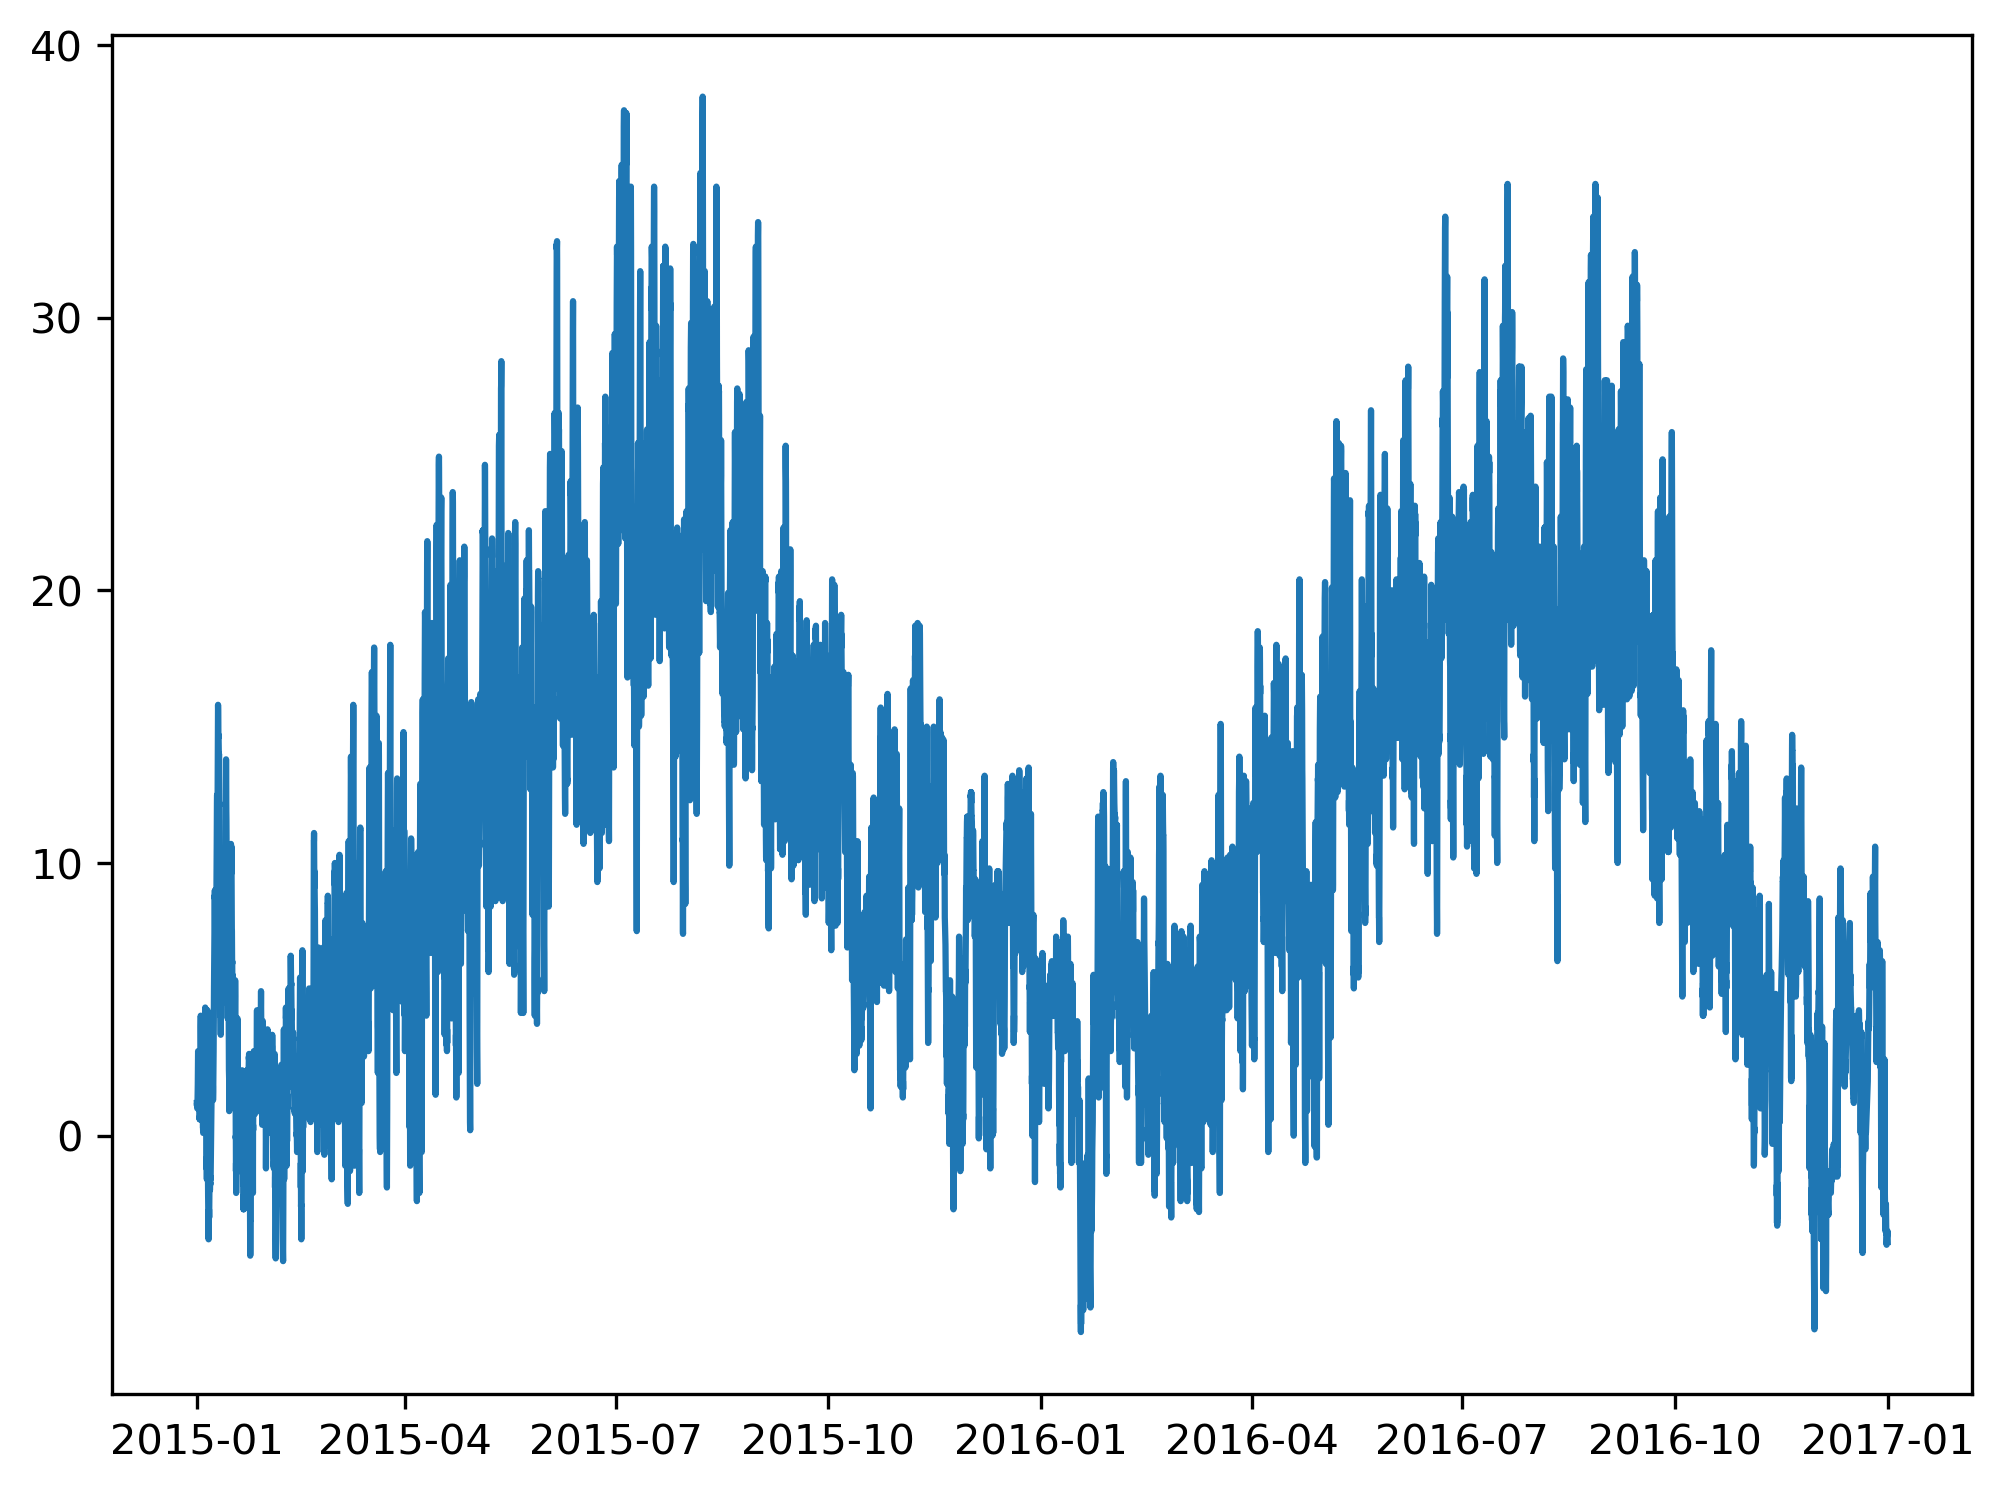

In [15]:
"""ns data visualization for data understanding purposes"""


Fig_1 = plt.figure(figsize=(8,6),dpi = 300)
plt.plot(Ind_Wetterdaten.index,Ind_Wetterdaten['Temperature'])
plt.show()

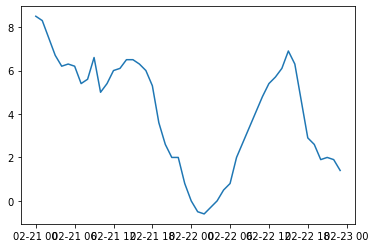

In [16]:
plt.plot(Ind_Wetterdaten.index[1224:1272],Ind_Wetterdaten['Temperature'][1224:1272]) #timeframe chosen for two random days
plt.show()

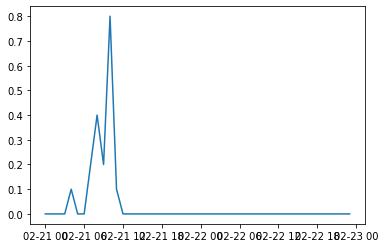

In [17]:
plt.plot(Ind_Wetterdaten.index[1224:1272],Ind_Wetterdaten['PrecipitationHeight'][1224:1272]) #timeframe chosen for two random days
plt.show()

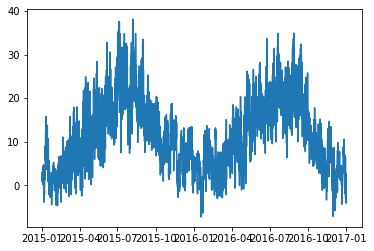

In [18]:
plt.plot(Ind_Wetterdaten.index,Ind_Wetterdaten['Temperature'])
plt.show()

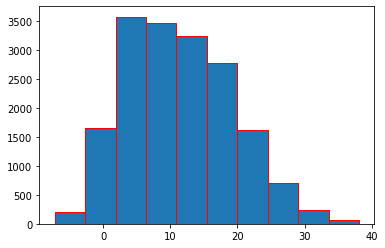

In [19]:
plt.hist(Ind_Wetterdaten['Temperature'], bins=10, edgecolor='red')
plt.show()

In [20]:
#ns creating a new dataframe with only the relevant columns and all rows for now
Rel_Wetterdaten = Ind_Wetterdaten.loc[:, ['Temperature','TotalCloudCover', 'PrecipitationHeight', 'Visibility', 'MeanWindSpeed']]

Rel_Wetterdaten.head()

,Temperature,TotalCloudCover,PrecipitationHeight,Visibility,MeanWindSpeed
FormattedDate,,,,,
2015-01-01 00:00:00,1.2,8,0.0,3000,1.6
2015-01-01 01:00:00,1.1,8,0.0,1500,1.3
2015-01-01 02:00:00,1.2,-1,0.0,700,1.2
2015-01-01 03:00:00,1.1,-1,0.0,600,1.0
2015-01-01 04:00:00,1.1,-1,0.0,700,0.8


In [21]:
#sm Using R² for every Column 

#sm Temperatur:
tempCloud = r2_score(Rel_Wetterdaten['Temperature'],Rel_Wetterdaten['TotalCloudCover'])
tempPrec = r2_score(Rel_Wetterdaten['Temperature'],Rel_Wetterdaten['PrecipitationHeight'])
tempVis = r2_score(Rel_Wetterdaten['Temperature'],Rel_Wetterdaten['Visibility'])
tempWind = r2_score(Rel_Wetterdaten['Temperature'],Rel_Wetterdaten['MeanWindSpeed'])

print("tempCloud=",tempCloud)
print("tempPrec=",tempPrec)
print("tempVis=",tempVis)
print("tempWind=",tempWind)

#sm Cloud Cover
cloudPrec = r2_score(Rel_Wetterdaten['TotalCloudCover'],Rel_Wetterdaten['PrecipitationHeight'])
cloudVis = r2_score(Rel_Wetterdaten['TotalCloudCover'],Rel_Wetterdaten['Visibility'])
cloudWind = r2_score(Rel_Wetterdaten['TotalCloudCover'],Rel_Wetterdaten['MeanWindSpeed'])

print("cloudPrec=",cloudPrec)
print("cloudVis=",cloudVis)
print("cloudWind=",cloudWind)

#sm Precipitation Height
precVis = r2_score(Rel_Wetterdaten['PrecipitationHeight'],Rel_Wetterdaten['Visibility'])
precWind = r2_score(Rel_Wetterdaten['PrecipitationHeight'],Rel_Wetterdaten['MeanWindSpeed'])

print("precVis=",precVis)
print("precWind=",precWind)

#sm Visibility
visWind = r2_score(Rel_Wetterdaten['Visibility'],Rel_Wetterdaten['MeanWindSpeed'])

print("visWind=",visWind)

tempCloud= -0.7913908258116122
tempPrec= -2.077168778557764
tempVis= -23959895.631408088
tempWind= -1.043698137899796
cloudPrec= -4.085582414624988
cloudVis= -215181224.2418236
cloudWind= -0.9358324669332598
precVis= -8030950360.735064
precWind= -84.37698354446164
visWind= -3.3332342997014823


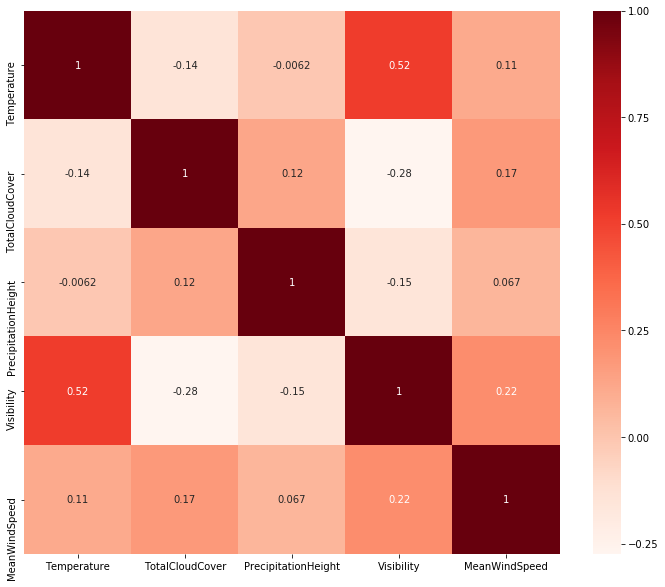

In [22]:
#sm Using Pearson Correlation
#sm Source: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b 
import seaborn as sns
plt.figure(figsize=(12,10))
cor = Rel_Wetterdaten.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()